<a href="https://colab.research.google.com/github/ayushchaware08/Machine_Learning_projects/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COUSTOMER CHURN PREDICTION

**Customer Churn** is defined as when customers or subscribers discontinue doing business with a firm or service.

To detect early signs of potential churn, first develop a holistic view and instances along many channels including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions.

Helps in preserving market position, lower the cost of initiation and the larger the profit.

**Insights from the Dataset**

1. What's the % of Churn Customers and customers that keep in with the active services?
2. Is there any patterns in Churn Customers based on the gender?
3. Is there any patterns/preference in Churn Customers based on the type of service provided?
4. What's the most profitable service types?
5. Which features and services are most profitable?
6. Many more questions that will arise during the analysis

# 1. Loding Librires

In [ ]:
import pandas as pd #for Data Manupulation
import numpy as np  # for Array operation
import matplotlib.pyplot as plt # Data visulization
import missingno as msno # Analyze Missing values in Dataset
import seaborn as sns # Statistical Data Visualization
# Plotly: Graphing library for data visualization
import plotly.express as px # functions to visualize a variety of types of data
import plotly.graph_objects as go # create a variety of plots and chart like Histogram, Boxplot
from plotly.subplots import make_subplots  # figures with subplots.
import warnings
warnings.filterwarnings('ignore')


# import : entire module
# from : import specific attribute


In [ ]:
!pip install catboost


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/sample_data/Churn Dataset.csv")

# 2. Understanding the Data


 **Services Opted :** phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movie.

 **Churn :** Who left last month

 **Customer Info :** Customer ID, contract, payment method, paperless billing, monthly charges, and total charges. gender, age range

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
1,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
2,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
3,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
4,6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 3. Vizualize Misssing Values

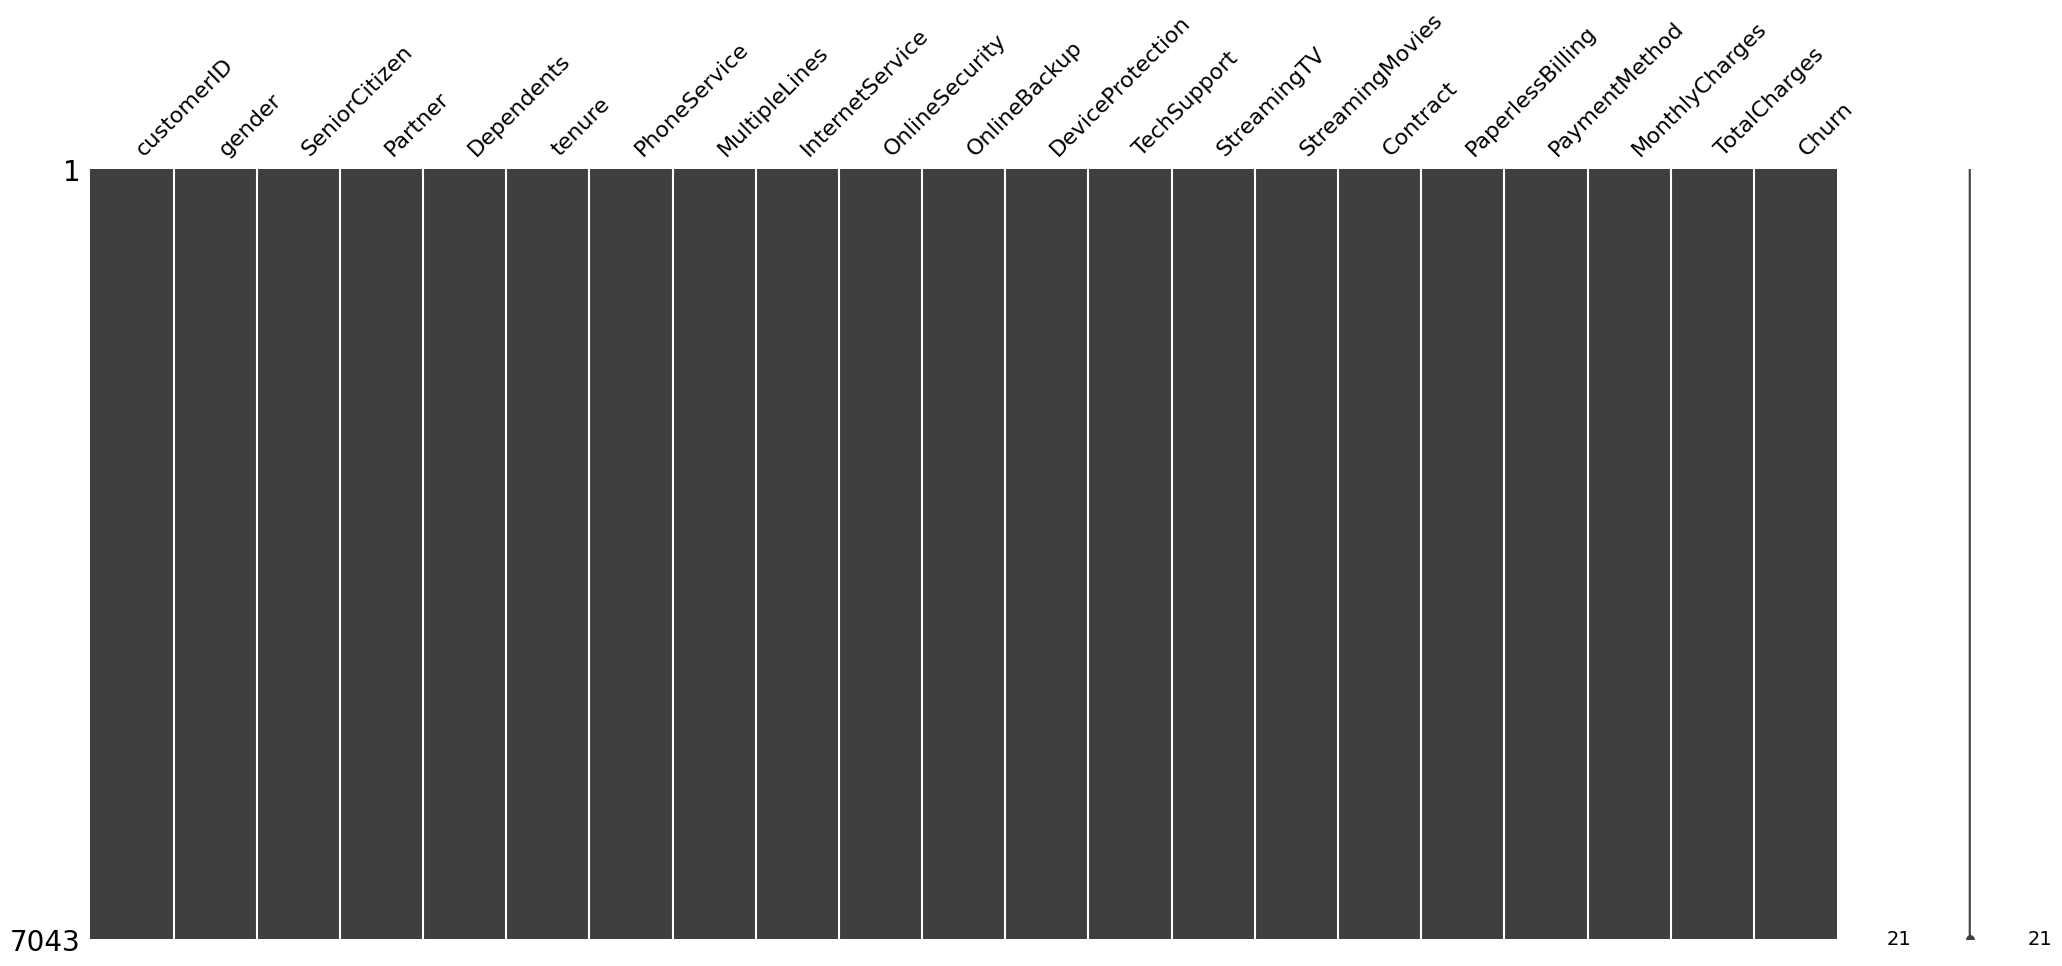

In [ ]:
msno.matrix(df);

# 4. Data Manipulation

In [ ]:
df = df.drop(['customerID'], axis = 1) # drop that column

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
1,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
2,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
3,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
4,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No


On deep analysis, we can find some indirect missingness in our data

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')


In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Getting all NaN Total Charges

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
978,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
1151,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
1270,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1356,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1521,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2820,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3128,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3490,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4023,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4934,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['tenure'] == 0].index

Int64Index([978, 1151, 1270, 1356, 1521, 2820, 3128, 3490, 4023, 4934, 4997], dtype='int64')

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

we can also fill the NaN values by replacing the Mean Value in with NaN Values.

In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
1,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
2,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
3,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
4,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,4,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
7039,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7040,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7041,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [ ]:
# Again check the Null Values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Done  **:)**  

Now, Replacing the value of Senior Citizen from

0 -> No

1 -> Yes

In [ ]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No",1:"Yes"})
# Let's see whats happening
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
1,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
2,Male,Yes,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
3,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
4,Female,Yes,Yes,No,25,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No


In [ ]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges','TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# 5. Data Visualization

### **PART 01** : Gender and Churn Distrubution

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

### **PART 02** : Churn Distribution wrt Gender

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

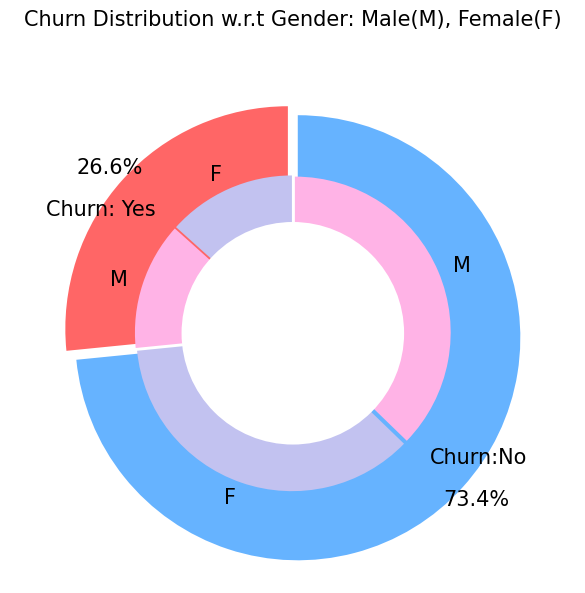

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

Both genders behaved in similar fashion when it comes to migrating to another service provider

### **PART 03** : Customer Contract Distribution

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

### **PART 04** : Payment Distribution System

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

### **PART 05** :  Customer Payment Method wrt Churn

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Electronic Check** (Payment Method) -> Major customers moved out

**Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check** (Payment Method) -> less likely to move out.

### **PART 06** : Churn Distribution wrt Internet Service and Gender

In [ ]:
df["InternetService"].unique()


array(['Fiber optic', 'DSL', 'No'], dtype=object)

In [ ]:
df[df["gender"]=="Male"][["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:
df[df["gender"]=="Female"][["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

### **PART 07** : Dependents Distribution

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

### **PART 08** : Churn Distribution wrt Partners

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

### **PART 09** : Churn Distribution wrt Senior Citizen

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.

### **PART 10** : Churn wrt Online Security

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Most customers churn in the absence of online security,

### **PART 11** : Churn Distribution wrt Paperless Billing

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with Paperless Billing are most likely to churn.

### **PART 12** : Churn Distribution wrt TechSupport

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with no TechSupport are most likely to migrate to another service provider.

### **PART 13** : Churn Prediction wrt PhoneService

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

### **PART 14** : Distribution of monthly charges by churn

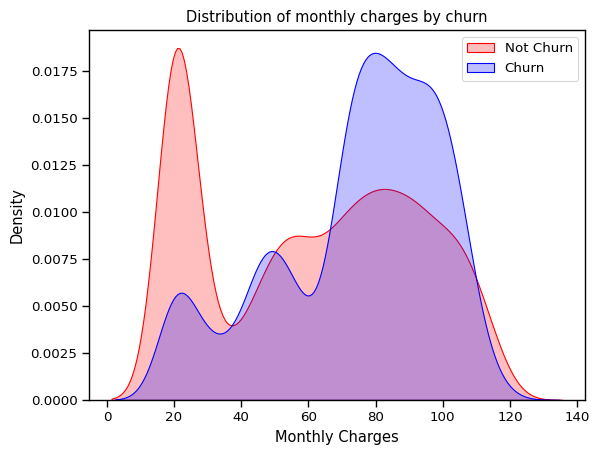

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn

**PART 15**

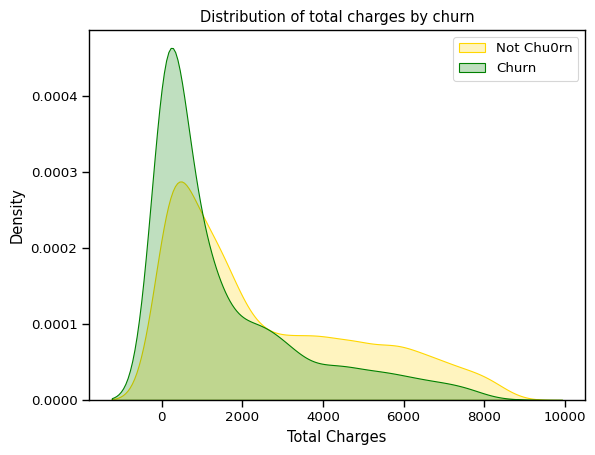

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

### **PART 16** : Tenure Vs Churn

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn

### **PART 17**  : ??

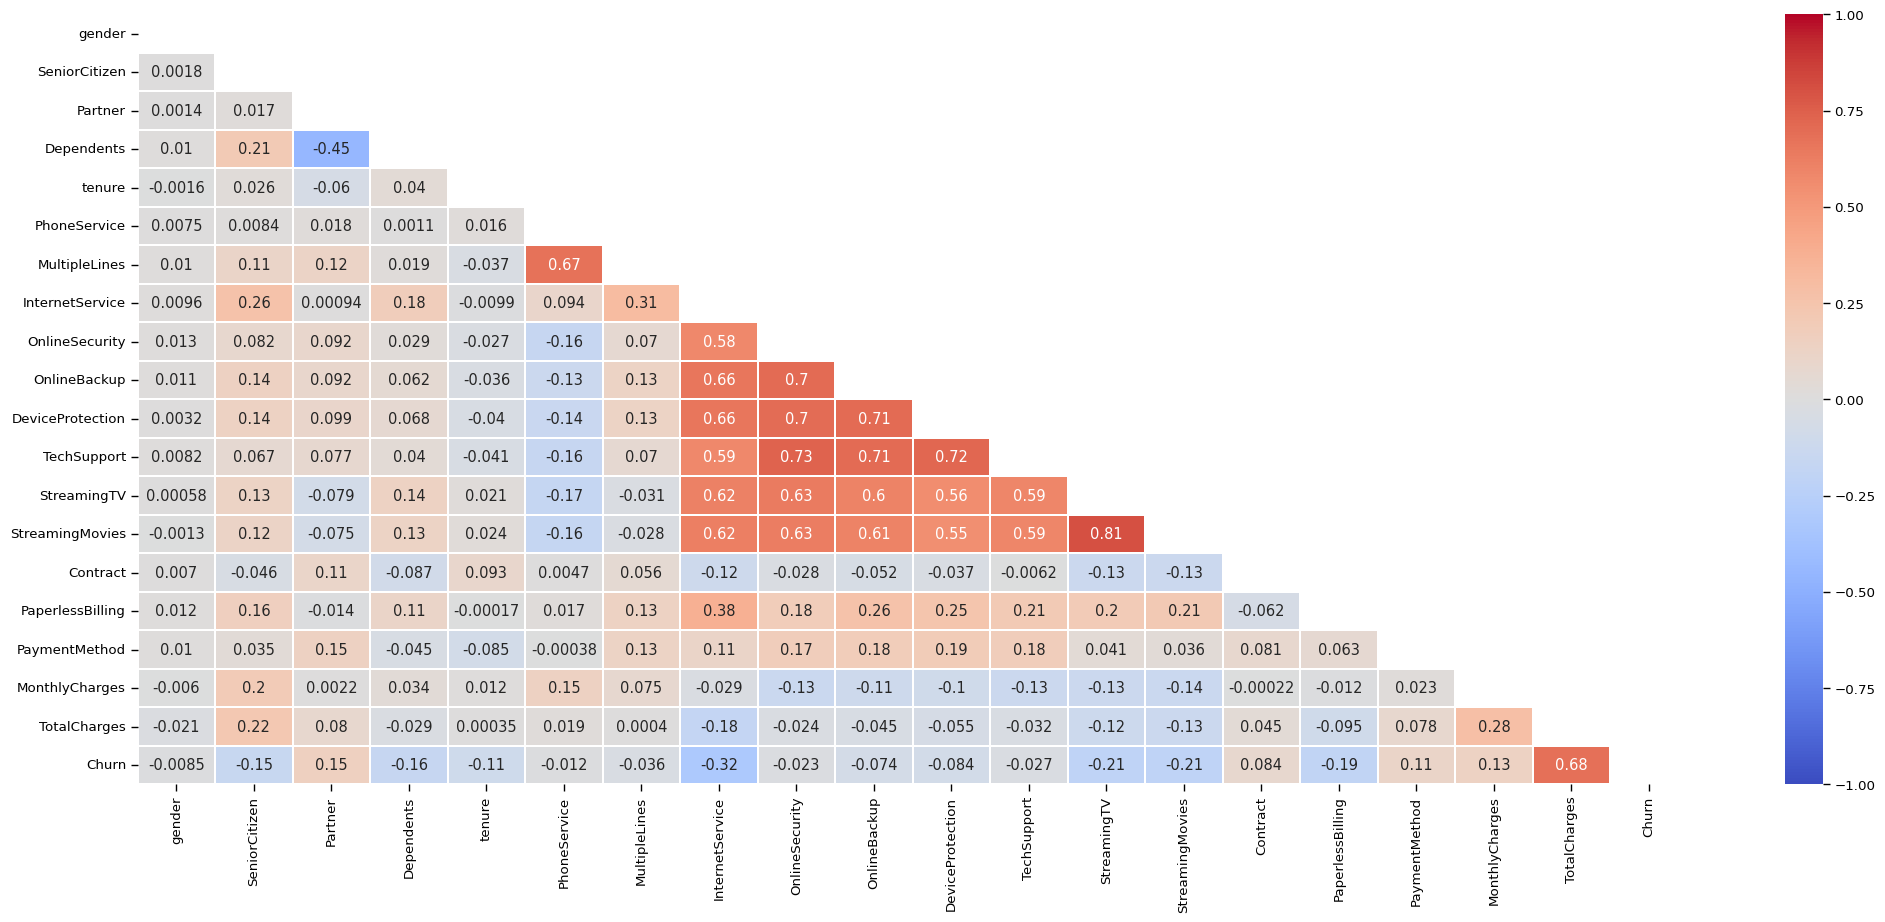

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

#6. Data Preprocessing

Spliting of Data

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,71,1,2,1,2,2,2,2,0,0,2,1,1,96.35,6766.95,0
1,1,1,1,0,2,1,0,1,0,0,2,0,2,2,0,1,1,95.50,181.65,0
2,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,45.25,45.25,0
3,0,1,0,0,43,1,2,1,0,2,0,0,2,0,0,1,2,90.25,3838.75,0
4,0,1,1,0,25,1,2,0,2,0,0,2,2,0,0,1,1,69.50,1752.65,0


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns =['Churn'])
Y = df['Churn'].values

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,71,1,2,1,2,2,2,2,0,0,2,1,1,96.35,6766.95,0
1,1,1,1,0,2,1,0,1,0,0,2,0,2,2,0,1,1,95.50,181.65,0
2,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,45.25,45.25,0
3,0,1,0,0,43,1,2,1,0,2,0,0,2,0,0,1,2,90.25,3838.75,0
4,0,1,1,0,25,1,2,0,2,0,0,2,2,0,0,1,1,69.50,1752.65,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 40, stratify=Y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

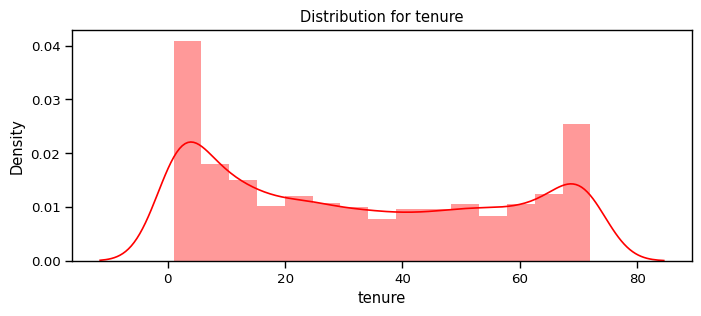

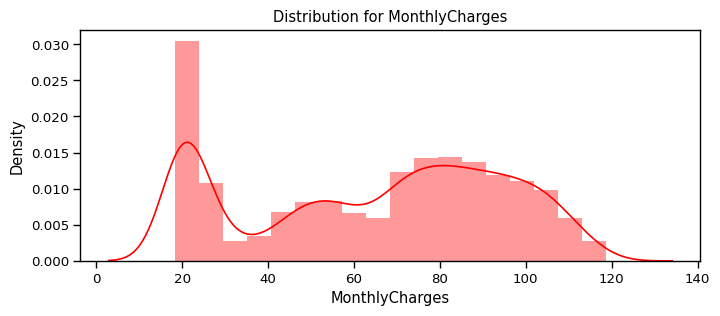

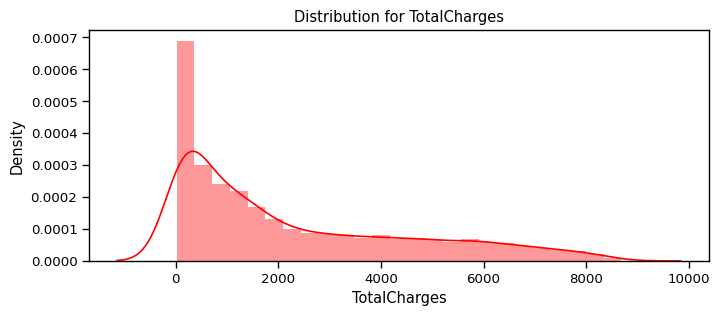

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

**Standardizing Numeric Attibutes**

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

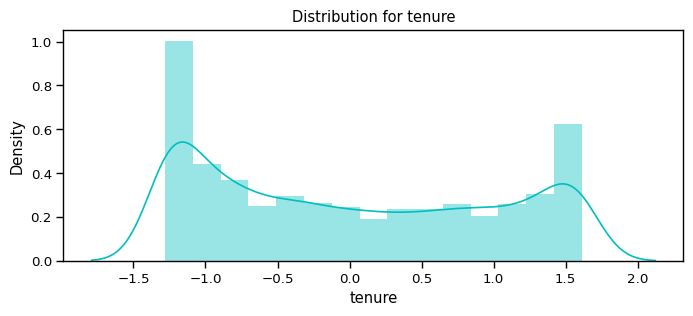

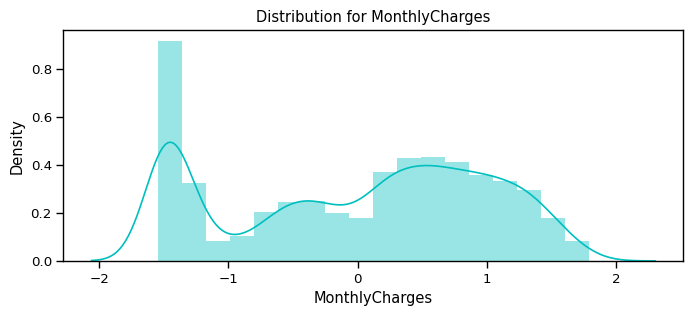

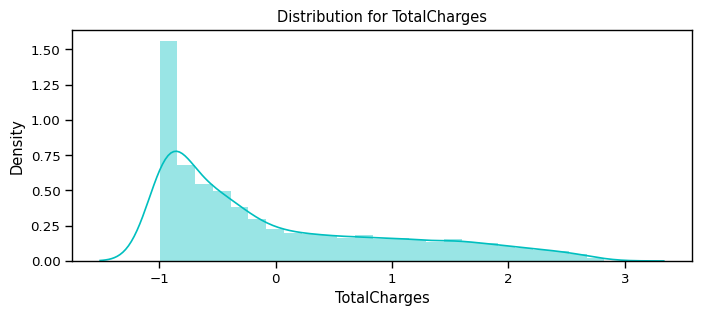

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#7. ML Model Evaluation and Prediction

### Method 1 : KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,Y_train)
predicted_Y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,Y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7862559241706161


In [ ]:
print(classification_report(Y_test, predicted_Y))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.77      0.79      0.78      2110



###Method 2: SVC

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,Y_train)
predict_Y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,Y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8


In [ ]:
print(classification_report(Y_test, predict_Y))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1549
           1       0.69      0.44      0.54       561

    accuracy                           0.80      2110
   macro avg       0.76      0.69      0.71      2110
weighted avg       0.79      0.80      0.78      2110



### Method 3 : Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, Y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(Y_test, prediction_test))

0.8018957345971564


In [ ]:
print(classification_report(Y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1549
           1       0.70      0.45      0.55       561

    accuracy                           0.80      2110
   macro avg       0.76      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



**RF Confusion Matrix**

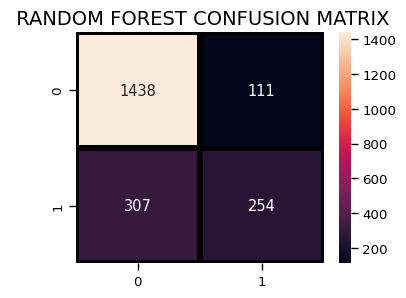

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

**RF ROC**

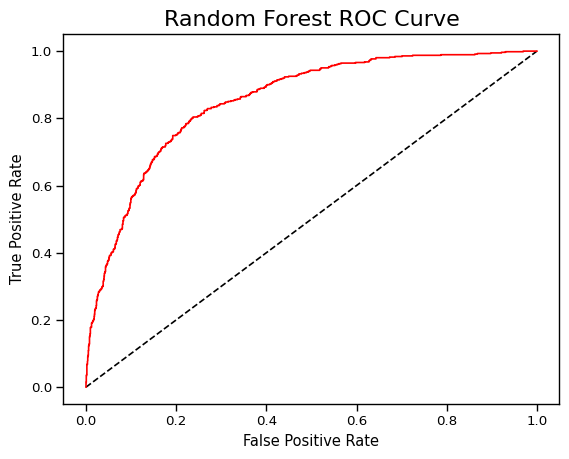

In [ ]:
Y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(Y_test, Y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

###  Method 4 : Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
accuracy_lr = lr_model.score(X_test,Y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8127962085308057


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(Y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.69      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



**LR Confusion Matrix**


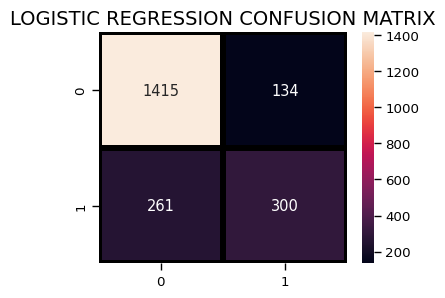

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**LR ROC**

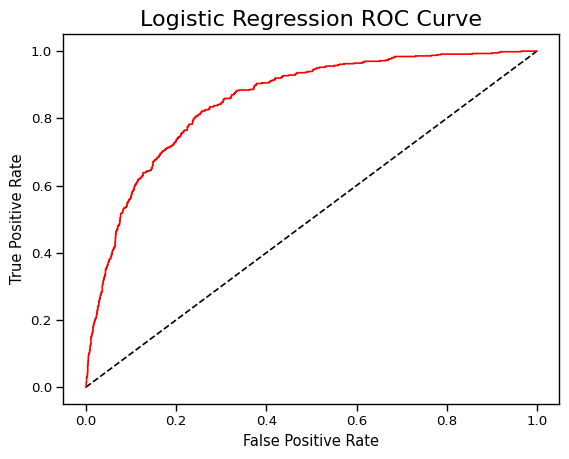

In [ ]:
Y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### Method 5 : Decision Tree Clasifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
predictdt_Y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_dt)

# Very Low Score

Decision Tree accuracy is : 0.737914691943128


In [ ]:
print(classification_report(Y_test, predictdt_Y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1549
           1       0.51      0.52      0.51       561

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



### Method 6 : AdaBoost Classifier

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,Y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(Y_test, a_preds)

AdaBoost Classifier accuracy


0.8066350710900474

In [ ]:
print(classification_report(Y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



**AdaBoost Classifier Confusion Matrix**

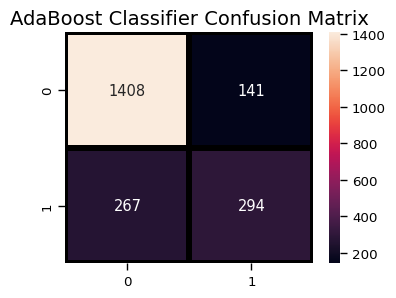

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, a_preds),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### Method 7 : Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(Y_test, gb_pred))

Gradient Boosting Classifier 0.8033175355450237


In [ ]:
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.68      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



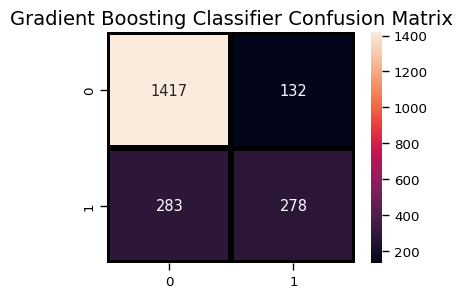

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, gb_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

### Method 8 : Voting Classifier

Let's now predict the final model based on the highest majority of voting and check it's score.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(Y_test, predictions))

Final Accuracy Score 
0.814218009478673


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.70      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.81      2110



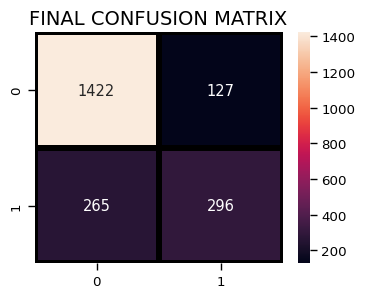

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()


_ _ _ _ _ _ _ _ _ __**Actual**_ _ __ _ _**Predicted**

non-churn- - - - 1422 - - - - - -  - - 127     

churn - - - - - - - - 265 - - - - - - -  - - - 296

.

There are 1422 + 127 = 1549 -> actual non-churn values and Algorithm predicts 1422 (non churn) and 127(churn)

While,

There are  265 + 295 = 560  -> actual churn values and the Algorithm predicts 235 (non churn) and 296 (churn)

---



# 8. Conclusion

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.